#Importing necessary libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from warnings import filterwarnings
filterwarnings('ignore')

#Linear Dataset


##Reading data

In [75]:
class1 = pd.read_table('/content/drive/MyDrive/LS/Class1.txt', header=None, names=['col1', 'col2', 'label'], delimiter=' ')
class1.label = 1
print(class1.head())
class2 = pd.read_table('/content/drive/MyDrive/LS/Class2.txt', header=None, names=['col1', 'col2', 'label'], delimiter=' ')
class2.label = 2
print(class2.head())
class3 = pd.read_table('/content/drive/MyDrive/LS/Class3.txt', header=None, names=['col1', 'col2', 'label'], delimiter=' ')
class3.label = 3
print(class3.head())

     col1     col2  label
0  15.258  0.11508      1
1  16.671 -1.07230      1
2  16.733  1.57740      1
3  14.472 -0.28159      1
4  15.268  0.65322      1
     col1     col2  label
0  7.4914 -12.5550      2
1  4.0181  -7.3413      2
2  2.9821 -12.0150      2
3  5.3682 -10.7970      2
4  6.9905 -11.0180      2
     col1     col2  label
0 -2.4248 -0.79712      3
1 -0.7276  0.58344      3
2 -3.1441 -3.11240      3
3 -1.9850  5.70980      3
4 -2.4081  0.81910      3


##Partitioning data into training, validation and testing

In [76]:
class1_training, class1_vaildation, class1_test = np.split(class1.sample(frac=1), [int(.6*len(class1)), int(.8*len(class1))])
class2_training, class2_vaildation, class2_test = np.split(class2.sample(frac=1), [int(.6*len(class2)), int(.8*len(class2))])
class3_training, class3_vaildation, class3_test = np.split(class3.sample(frac=1), [int(.6*len(class3)), int(.8*len(class3))])
training = pd.concat([class1_training, class2_training, class3_training])
validation = pd.concat([class1_vaildation, class2_vaildation, class3_vaildation])
test = pd.concat([class1_test, class2_test, class3_test])
training = training.sample(frac=1)
validation = validation.sample(frac=1)
test = test.sample(frac=1)
print(training.shape)
print(validation.shape)
print(test.shape)

(900, 3)
(300, 3)
(300, 3)


##A plot of the validation data

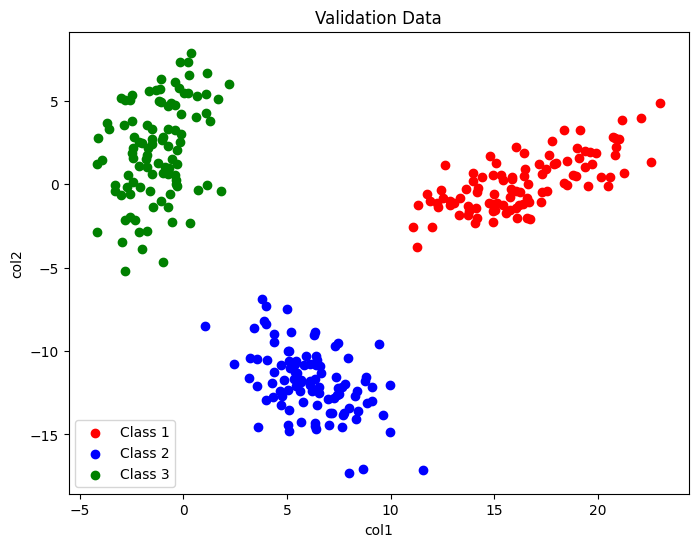

In [77]:
# Separate data by class
class1_validation = validation[validation['label'] == 1]
class2_validation = validation[validation['label'] == 2]
class3_validation = validation[validation['label'] == 3]

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_validation['col1'], class1_validation['col2'], color='red', label='Class 1')
plt.scatter(class2_validation['col1'], class2_validation['col2'], color='blue', label='Class 2')
plt.scatter(class3_validation['col1'], class3_validation['col2'], color='green', label='Class 3')

plt.xlabel('col1')
plt.ylabel('col2')
plt.title('Validation Data')
plt.legend()
plt.show()


##Defining our neural network with one layer

In [83]:
def softmax(z):
    exp_values = np.exp(z - np.max(z, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    return probabilities

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def squared_loss(y_pred, y_true):
    loss = np.mean((y_pred - y_true)**2)
    return loss

def backward(X, y_true, y_pred, W1, W2, b1, b2, a1, z1, learning_rate):
    n_samples = X.shape[0]
    dL_dz2 = 2 * (y_pred - y_true) / n_samples # Gradient for squared loss
    dL_dW2 = np.dot(a1.T, dL_dz2)
    dL_db2 = np.sum(dL_dz2, axis=0)

    # Gradients for the first hidden layer
    dL_dz1 = np.dot(dL_dz2, W2.T) * relu_derivative(z1)
    dL_dW1 = np.dot(X.T, dL_dz1)
    dL_db1 = np.sum(dL_dz1, axis=0)

    # Update weights and biases
    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2

    return W1, W2, b1, b2

# Neural Network Model
def train(X, y, epochs=1000, learning_rate=0.01, hidden_size1=1):
    input_size = X.shape[1]
    output_size = len(np.unique(y))

    # Initialize weights and biases
    W1 = np.random.randn(input_size, hidden_size1)
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, output_size)
    b2 = np.zeros((1, output_size))

    y_one_hot = np.eye(output_size)[y-1]


    for epoch in range(epochs):
        # Forward Propagation
        z1 = np.dot(X, W1) + b1
        a1 = relu(z1)
        z2 =  np.dot(a1, W2) + b2
        y_pred = softmax(z2)

        # Loss Calculation
        loss = squared_loss(y_pred, y_one_hot) # Use squared loss

        # Backward Propagation and weight update
        W1, W2, b1, b2= backward(X, y_one_hot, y_pred, W1, W2, b1, b2, a1, z1, learning_rate)

        if epoch % 100 == 0:
            print(f'Epoch {epoch} Loss: {loss}')

    return W1, W2, b1, b2,

# Prediction
def predict(X, W1, W2, b1, b2):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = softmax(z2)
    return np.argmax(y_pred, axis=1)


###Hidden node=1, learning rate=0.001

Epoch 0 Loss: 0.2172417572406745
Epoch 100 Loss: 0.16560210562024555
Epoch 200 Loss: 0.15985071865110076
Epoch 300 Loss: 0.15458691779008202
Epoch 400 Loss: 0.14981434228348672
Epoch 500 Loss: 0.1455106920842643
Epoch 600 Loss: 0.14162687048028724
Epoch 700 Loss: 0.13809715302205205
Epoch 800 Loss: 0.13485323720852
Epoch 900 Loss: 0.13183770040907347
Validation Accuracy: 73.33%


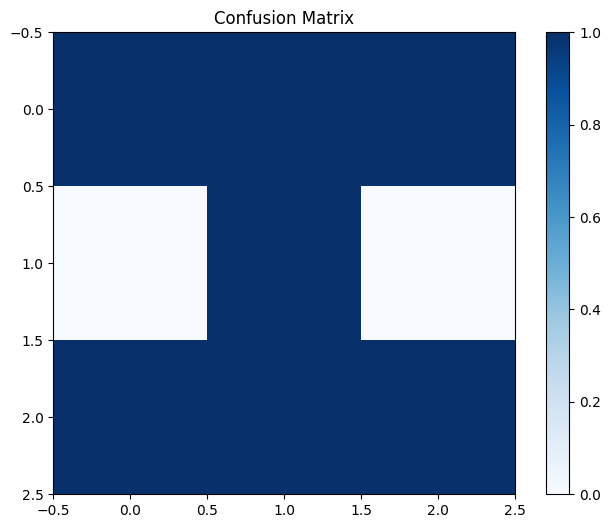

In [85]:
w1_1, w2_1, b1_1, b2_1 = train(training.drop('label', axis=1).values, training['label'].values, 1000, 0.001, 1)
y_pred = predict(validation.drop('label', axis=1).values , w1_1, w2_1, b1_1, b2_1)
accuracy = np.mean(y_pred == validation['label'].values-1)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

confusion_matrix = np.zeros((3, 3))
confusion_matrix[validation['label'].values-1, y_pred] += 1
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

###Hidden Node=2, learning rate=0.001


Epoch 0 Loss: 0.35919851452739826
Epoch 100 Loss: 0.14787465549587075
Epoch 200 Loss: 0.06524742007475216
Epoch 300 Loss: 0.057477754439877134
Epoch 400 Loss: 0.054130970013583725
Epoch 500 Loss: 0.05154260310676146
Epoch 600 Loss: 0.04924735308846687
Epoch 700 Loss: 0.047119208864600824
Epoch 800 Loss: 0.04511267971936826
Epoch 900 Loss: 0.04320228156304496
Validation Accuracy: 99.00%


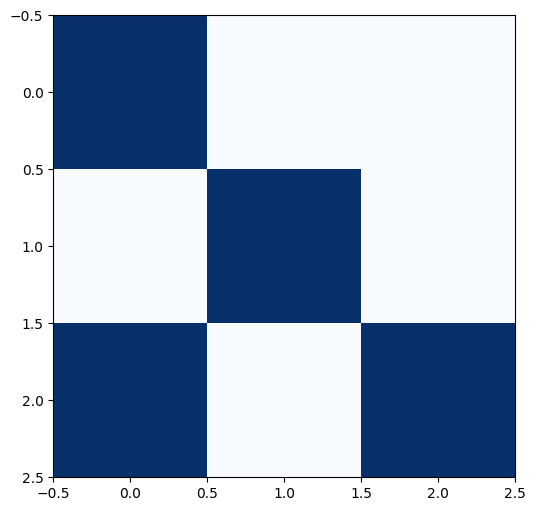

In [86]:
w1_2, w2_2, b1_2, b2_2 = train(training.drop('label', axis=1).values, training['label'].values, 1000, 0.001, 2)
y_pred = predict(validation.drop('label', axis=1).values , w1_2, w2_2, b1_2, b2_2)
accuracy = np.mean(y_pred == validation['label'].values-1)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

confusion_matrix = np.zeros((3, 3))
confusion_matrix[validation['label'].values-1, y_pred] += 1
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')

###Hidden node=5, learning rate=0.001

Epoch 0 Loss: 0.4268619181725528
Epoch 100 Loss: 0.16683024426777357
Epoch 200 Loss: 0.14834607070501588
Epoch 300 Loss: 0.13067875483263272
Epoch 400 Loss: 0.10808901806023953
Epoch 500 Loss: 0.07953804436569435
Epoch 600 Loss: 0.0634867781725959
Epoch 700 Loss: 0.05326033495535255
Epoch 800 Loss: 0.04563219225374913
Epoch 900 Loss: 0.039946260123160826
Validation Accuracy: 96.00%


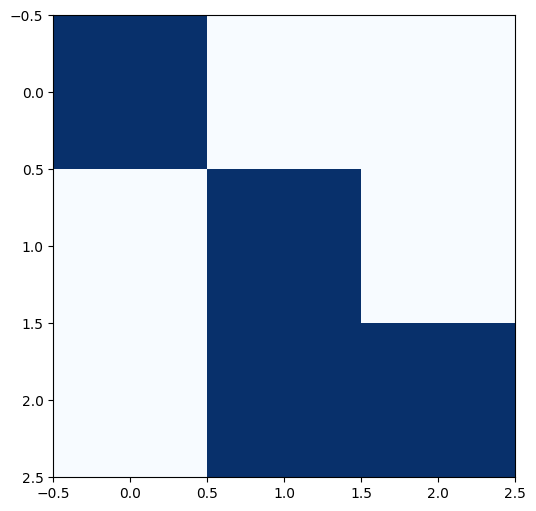

In [87]:
w1_5, w2_5, b1_5, b2_5 = train(training.drop('label', axis=1).values, training['label'].values, 1000, 0.001, 5)
y_pred = predict(validation.drop('label', axis=1).values , w1_5, w2_5, b1_5, b2_5)
accuracy = np.mean(y_pred == validation['label'].values-1)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

confusion_matrix = np.zeros((3, 3))
confusion_matrix[validation['label'].values-1, y_pred] += 1
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')

###Hidden node=10, learning rate=0.001

Epoch 0 Loss: 0.3670359590991563
Epoch 100 Loss: 0.11943361879989801
Epoch 200 Loss: 0.029451378890708424
Epoch 300 Loss: 0.013950766312020054
Epoch 400 Loss: 0.010644980290375972
Epoch 500 Loss: 0.009111830775335563
Epoch 600 Loss: 0.00818977268622908
Epoch 700 Loss: 0.00754552382332679
Epoch 800 Loss: 0.007056327779162725
Epoch 900 Loss: 0.006665964352007095
Epoch 1000 Loss: 0.006341110625634812
Epoch 1100 Loss: 0.006059578451672326
Epoch 1200 Loss: 0.005815360449085581
Epoch 1300 Loss: 0.005601409904272668
Epoch 1400 Loss: 0.005411432458342912
Epoch 1500 Loss: 0.005240849880592957
Epoch 1600 Loss: 0.00508605234029995
Epoch 1700 Loss: 0.004944856478729349
Epoch 1800 Loss: 0.004815004413889426
Epoch 1900 Loss: 0.004694720763061863
Epoch 2000 Loss: 0.0045829950501419135
Epoch 2100 Loss: 0.0044788225820225945
Epoch 2200 Loss: 0.004381329779581204
Epoch 2300 Loss: 0.004289766073416165
Epoch 2400 Loss: 0.0042035043415041455
Epoch 2500 Loss: 0.004122026516581093
Epoch 2600 Loss: 0.00404487

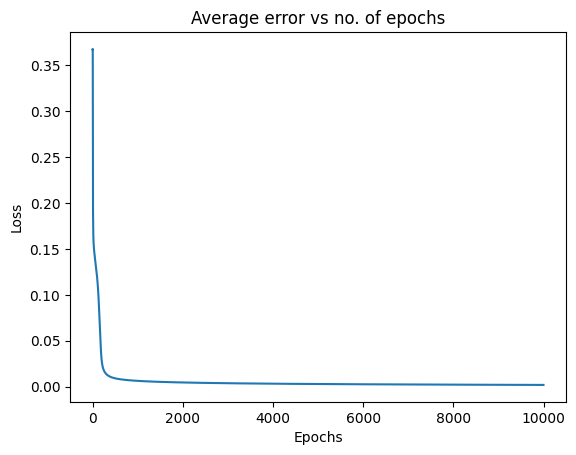

Validation Accuracy: 99.67%


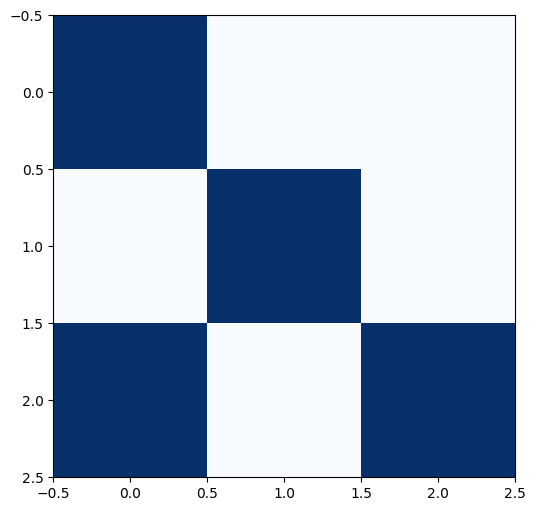

In [100]:
w1_10, w2_10, b1_10, b2_10 = train(training.drop('label', axis=1).values, training['label'].values, 10000, 0.001, 10)
y_pred = predict(validation.drop('label', axis=1).values , w1_10, w2_10, b1_10, b2_10)
accuracy = np.mean(y_pred == validation['label'].values-1)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

confusion_matrix = np.zeros((3, 3))
confusion_matrix[validation['label'].values-1, y_pred] += 1
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')


###Hidden node=20, learning rate=0.001

Epoch 0 Loss: 0.3801263927172767
Epoch 100 Loss: 0.06945505058992472
Epoch 200 Loss: 0.056548756650242775
Epoch 300 Loss: 0.03141137153697982
Epoch 400 Loss: 0.007937578557556647
Epoch 500 Loss: 0.004309607651606104
Epoch 600 Loss: 0.0035115485467955483
Epoch 700 Loss: 0.0031799901719647182
Epoch 800 Loss: 0.002989603952974496
Epoch 900 Loss: 0.0028582659906833245
Epoch 1000 Loss: 0.0027583721872747697
Epoch 1100 Loss: 0.0026766513578284283
Epoch 1200 Loss: 0.0026088775807716776
Epoch 1300 Loss: 0.002550083772909799
Epoch 1400 Loss: 0.0024967928240070955
Epoch 1500 Loss: 0.002447618034959435
Epoch 1600 Loss: 0.0024011009512541768
Epoch 1700 Loss: 0.0023567623020658507
Epoch 1800 Loss: 0.0023145414345163776
Epoch 1900 Loss: 0.0022741629737204044
Epoch 2000 Loss: 0.0022353879347287394
Epoch 2100 Loss: 0.0021980161379510864
Epoch 2200 Loss: 0.002161892945750847
Epoch 2300 Loss: 0.002126882743337054
Epoch 2400 Loss: 0.0020926099007084176
Epoch 2500 Loss: 0.0020590763587378835
Epoch 2600 Lo

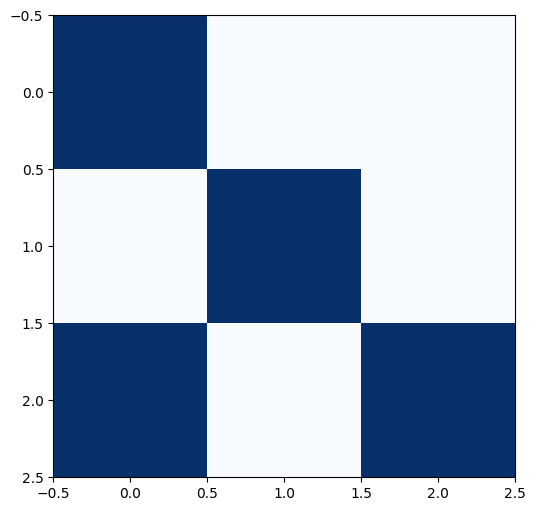

In [92]:
w1_20, w2_20, b1_20, b2_20 = train(training.drop('label', axis=1).values, training['label'].values, 5000, 0.001, 20)
y_pred = predict(validation.drop('label', axis=1).values , w1_20, w2_20, b1_20, b2_20)
accuracy = np.mean(y_pred == validation['label'].values-1)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

confusion_matrix = np.zeros((3, 3))
confusion_matrix[validation['label'].values-1, y_pred] += 1
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')

##Average error vs no. of epochs


Epoch 0 Loss: 0.5591358163355794
Epoch 100 Loss: 0.08973067825084859
Epoch 200 Loss: 0.05648782971549979
Epoch 300 Loss: 0.04023705764391087
Epoch 400 Loss: 0.03067118351093666
Epoch 500 Loss: 0.024261444170674537
Epoch 600 Loss: 0.019868507777698403
Epoch 700 Loss: 0.016769338976190762
Epoch 800 Loss: 0.014436254979993825
Epoch 900 Loss: 0.012554465936763676
Epoch 1000 Loss: 0.011029874257210278
Epoch 1100 Loss: 0.009763389832863385
Epoch 1200 Loss: 0.008717963547567036
Epoch 1300 Loss: 0.007864342732500959
Epoch 1400 Loss: 0.007161628170215006
Epoch 1500 Loss: 0.006574814716472488
Epoch 1600 Loss: 0.006074635628239705
Epoch 1700 Loss: 0.005652921950901971
Epoch 1800 Loss: 0.005282732739666135
Epoch 1900 Loss: 0.00495082469191732
Epoch 2000 Loss: 0.004654090912231984
Epoch 2100 Loss: 0.004391867389348366
Epoch 2200 Loss: 0.004161986975866515
Epoch 2300 Loss: 0.003959336934479862
Epoch 2400 Loss: 0.0037796705120946685
Epoch 2500 Loss: 0.0036191672640237087
Epoch 2600 Loss: 0.0034749305

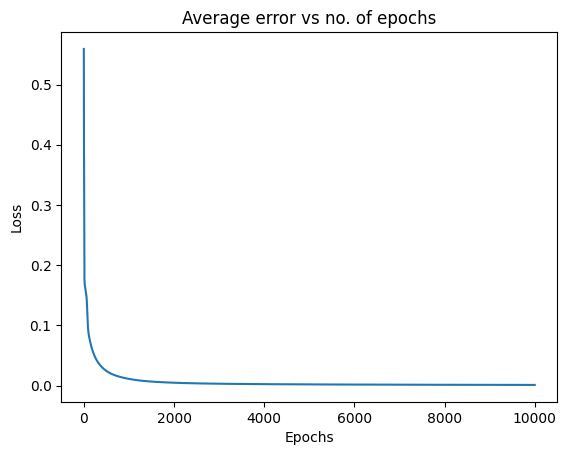

In [93]:
def train(X, y, epochs=1000, learning_rate=0.01, hidden_size1=1):
    input_size = X.shape[1]
    output_size = len(np.unique(y))

    # Initialize weights and biases
    W1 = np.random.randn(input_size, hidden_size1)
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, output_size)
    b2 = np.zeros((1, output_size))

    y_one_hot = np.eye(output_size)[y-1]
    Loss = []

    for epoch in range(epochs):
        # Forward Propagation
        z1 = np.dot(X, W1) + b1
        a1 = relu(z1)
        z2 =  np.dot(a1, W2) + b2
        y_pred = softmax(z2)

        # Loss Calculation
        loss = squared_loss(y_pred, y_one_hot) # Use squared loss
        Loss.append(loss)

        # Backward Propagation and weight update
        W1, W2, b1, b2= backward(X, y_one_hot, y_pred, W1, W2, b1, b2, a1, z1, learning_rate)

        if epoch % 100 == 0:
            print(f'Epoch {epoch} Loss: {loss}')
    plt.plot(range(epochs), Loss)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Average error vs no. of epochs')
    plt.show()

    return W1, W2, b1, b2

W1_10, W2_10, b1_10, b2_10 = train(training.drop('label', axis=1).values, training['label'].values, 10000, 0.001, 10)

##Plotting classifier lines with training data.
kept hidden nodes=10

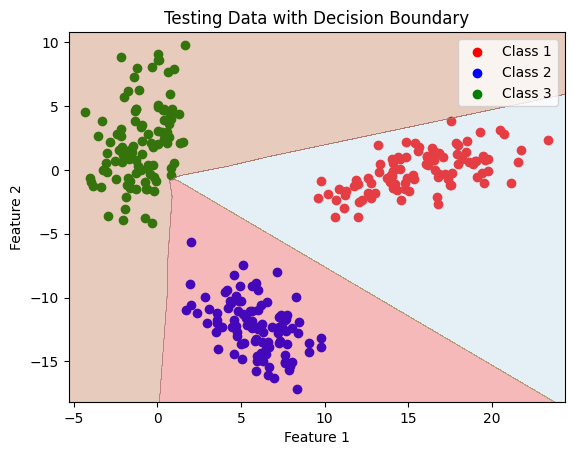

In [96]:
def plot_classifier(X, y, W1, W2, b1, b2):
  # Separate data by class
  class1_x = X[y == 1, 0]
  class1_y = X[y == 1, 1]
  class2_x = X[y == 2, 0]
  class2_y = X[y == 2, 1]
  class3_x = X[y == 3, 0]
  class3_y = X[y == 3, 1]

  plt.scatter(class1_x, class1_y, color='red', label='Class 1')
  plt.scatter(class2_x, class2_y, color='blue', label='Class 2')
  plt.scatter(class3_x, class3_y, color='green', label='Class 3')

  # Generate grid for plotting decision boundary
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  # Predict on the grid
  grid = np.c_[xx.ravel(), yy.ravel()]
  z1 = np.dot(grid, W1) + b1
  a1 = nl_relu(z1)
  z2 = np.dot(a1, W2) + b2
  y_pred = nl_softmax(z2)
  Z = np.argmax(y_pred, axis=1) + 1  # Get the predicted class
  Z = Z.reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Testing Data with Decision Boundary')
  plt.legend()
  plt.show()

plot_classifier(test.drop('label', axis=1).values, test['label'].values, W1_10, W2_10, b1_10, b2_10)


##Confusion Matrix and Classification Accuracy

Accuracy: 0.75


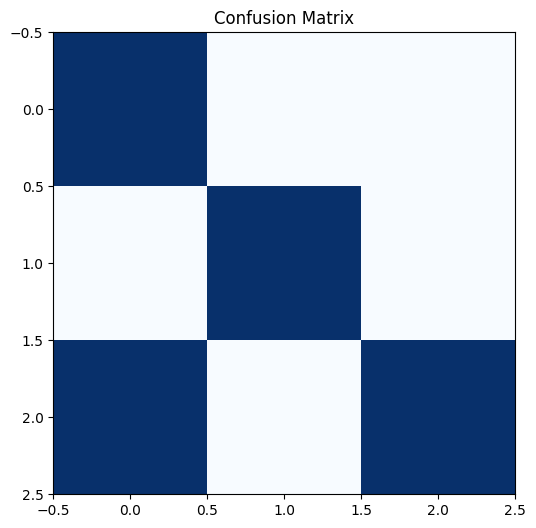

In [102]:
y_pred = predict(test.drop('label', axis=1).values , W1_10, W2_10, b1_10, b2_10)

confusion_matrix = np.zeros((3, 3))
confusion_matrix[test['label'].values-1, y_pred] += 1

plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')

accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
print(f"Accuracy: {accuracy}")

##Plots of varoius layers

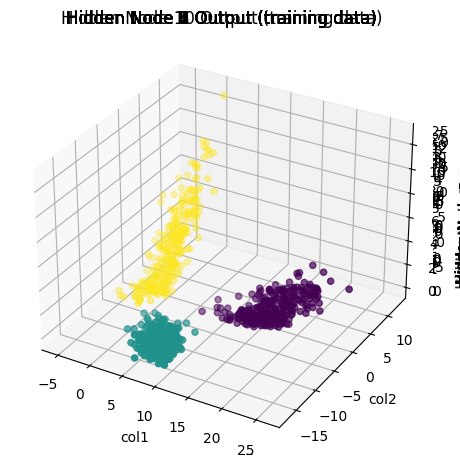

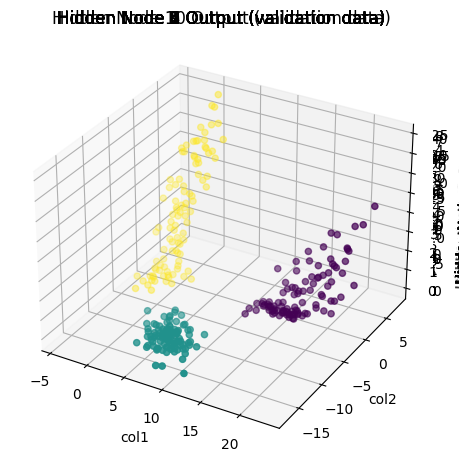

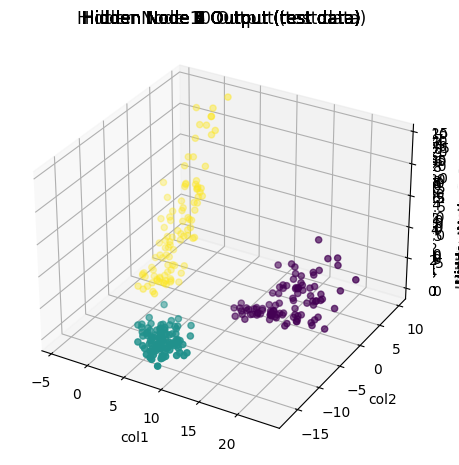

In [104]:
def plot_hidden_output_nodes(X, y, W1, W2, b1, b2, data_type):

  # Forward Propagation
  z1 = np.dot(X, W1) + b1
  a1 = nl_relu(z1)
  z2 = np.dot(a1, W2) + b2
  y_pred = nl_softmax(z2)

  # Plotting hidden layer outputs
  fig = plt.figure(figsize=(12, 6))
  for i in range(W2.shape[0]):  # Iterate over hidden nodes
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], a1[:, i], c=y, cmap='viridis')
    ax.set_xlabel('col1')
    ax.set_ylabel('col2')
    ax.set_zlabel(f'Hidden Node {i+1} Output')
    ax.set_title(f'Hidden Node {i+1} Output ({data_type} data)')


# Plot for training data
plot_hidden_output_nodes(training.drop('label', axis=1).values, training['label'].values, W1_10, W2_10, b1_10, b2_10, 'training')

# Plot for validation data
plot_hidden_output_nodes(validation.drop('label', axis=1).values, validation['label'].values, W1_10, W2_10, b1_10, b2_10, 'validation')

# Plot for test data
plot_hidden_output_nodes(test.drop('label', axis=1).values, test['label'].values, W1_10, W2_10, b1_10, b2_10, 'test')


#Nonlinear dataset

##Reading Data

In [21]:
nl_data = pd.read_table('/content/drive/MyDrive/NLS.txt', header=None, names=['col1', 'col2', 'label'], delimiter=' ')
nl_class1 = nl_data.iloc[0:300]
nl_class2 = nl_data.iloc[300:800]
nl_class3 = nl_data.iloc[800:1800]
nl_class1.label = 1
nl_class2.label = 2
nl_class3.label = 3
print(nl_class1.head())
print(nl_class2.head())
print(nl_class3.head())

       col1      col2  label
0 -0.380352 -0.390977      1
1 -0.416680  0.214674      1
2 -0.974757  0.263573      1
3 -1.129312 -0.387884      1
4  1.054486 -0.333915      1
         col1      col2  label
300  2.177058 -0.700472      2
301 -1.688208 -1.626058      2
302  1.691636 -1.581580      2
303  1.588604 -1.097625      2
304  1.630993 -1.370122      2
         col1      col2  label
800 -1.454964  5.142118      3
801 -1.057988 -5.410215      3
802  4.307847  1.268187      3
803  3.109500 -2.005986      3
804  3.993878  0.824427      3


##Partitioning data

In [22]:
nl_class1_training, nl_class1_vaildation, nl_class1_test = np.split(nl_class1.sample(frac=1), [int(.6*len(nl_class1)), int(.8*len(nl_class1))])
nl_class2_training, nl_class2_validation, nl_class2_test = np.split(nl_class2.sample(frac=1), [int(.6*len(nl_class2)), int(.8*len(nl_class2))])
nl_class3_training, nl_class3_validation, nl_class3_test = np.split(nl_class3.sample(frac=1), [int(.6*len(nl_class3)), int(.8*len(nl_class3))])
nl_training = pd.concat([nl_class1_training, nl_class2_training, nl_class3_training])
nl_validation = pd.concat([nl_class1_vaildation, nl_class2_validation, nl_class3_validation])
nl_test = pd.concat([nl_class1_test, nl_class2_test, nl_class3_test])
nl_training = nl_training.sample(frac=1)
nl_validation = nl_validation.sample(frac=1)
nl_test = nl_test.sample(frac=1)
print(nl_training.shape)
print(nl_validation.shape)
print(nl_test.shape)

(1080, 3)
(360, 3)
(360, 3)


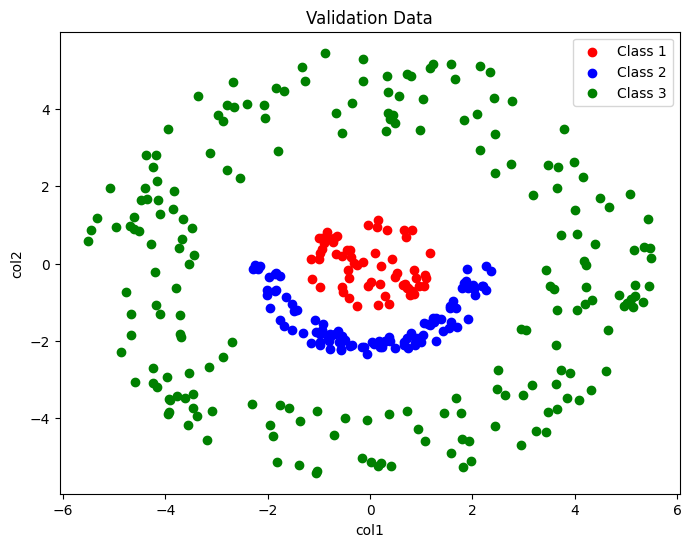

In [23]:
# Separate data by class
nl_class1_validation = nl_validation[nl_validation['label'] == 1]
nl_class2_validation = nl_validation[nl_validation['label'] == 2]
nl_class3_validation = nl_validation[nl_validation['label'] == 3]

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(nl_class1_validation['col1'], nl_class1_validation['col2'], color='red', label='Class 1')
plt.scatter(nl_class2_validation['col1'], nl_class2_validation['col2'], color='blue', label='Class 2')
plt.scatter(nl_class3_validation['col1'], nl_class3_validation['col2'], color='green', label='Class 3')

plt.xlabel('col1')
plt.ylabel('col2')
plt.title('Validation Data')
plt.legend()
plt.show()


In [66]:
def nl_softmax(z):
    exp_values = np.exp(z - np.max(z, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    return probabilities

def nl_relu(z):
    return np.maximum(0, z)

def nl_relu_derivative(z):
    return np.where(z > 0, 1, 0)

def nl_squared_loss(y_pred, y_true):
    loss = np.mean((y_pred - y_true)**2)
    return loss

def nl_backward(X, y_true, y_pred, W1, W2, W3, b1, b2, b3, a1, a2, z1, z2, learning_rate):
    n_samples = X.shape[0]
    dL_dz3 = 2 * (y_pred - y_true) / n_samples # Gradient for squared loss

    # Gradients for W3 and b3
    dL_dW3 = np.dot(a2.T, dL_dz3)
    dL_db3 = np.sum(dL_dz3, axis=0, keepdims=True)

    # Gradients for the second hidden layer
    dL_dz2 = np.dot(dL_dz3, W3.T) * nl_relu_derivative(z2)
    dL_dW2 = np.dot(a1.T, dL_dz2)
    dL_db2 = np.sum(dL_dz2, axis=0)

    # Gradients for the first hidden layer
    dL_dz1 = np.dot(dL_dz2, W2.T) * nl_relu_derivative(z1)
    dL_dW1 = np.dot(X.T, dL_dz1)
    dL_db1 = np.sum(dL_dz1, axis=0)

    # Update weights and biases
    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2
    W3 -= learning_rate * dL_dW3
    b3 -= learning_rate * dL_db3

    return W1, W2, W3, b1, b2, b3

# Neural Network Model
def nl_train(X, y, epochs=1000, learning_rate=0.01, hidden_layer_sizes=(64, 64)):
    input_size = X.shape[1]
    hidden_size1, hidden_size2 = hidden_layer_sizes
    output_size = len(np.unique(y))

    # Initialize weights and biases
    W1 = np.random.randn(input_size, hidden_size1)
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2)
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size)
    b3 = np.zeros((1, output_size))

    y_one_hot = np.eye(output_size)[y-1]


    for epoch in range(epochs):
        # Forward Propagation
        z1 = np.dot(X, W1) + b1
        a1 = nl_relu(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = nl_relu(z2)
        z3 = np.dot(a2, W3) + b3
        y_pred = nl_softmax(z3)

        # Loss Calculation
        loss = nl_squared_loss(y_pred, y_one_hot) # Use squared loss

        # Backward Propagation and weight update
        W1, W2, W3, b1, b2, b3 = nl_backward(X, y_one_hot, y_pred, W1, W2, W3, b1, b2, b3, a1, a2, z1, z2, learning_rate)

        if epoch % 100 == 0:
            print(f'Epoch {epoch} Loss: {loss}')

    return W1, W2, W3, b1, b2, b3

# Prediction
def nl_predict(X, W1, W2, W3, b1, b2, b3):
    z1 = np.dot(X, W1) + b1
    a1 = nl_relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = nl_relu(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = nl_softmax(z3)
    return np.argmax(y_pred, axis=1)


###Hidden nodes 1, 2

Epoch 0 Loss: 0.2222222222222223
Epoch 100 Loss: 0.20212784914464357
Epoch 200 Loss: 0.19716778260515586
Epoch 300 Loss: 0.1959578327304513
Epoch 400 Loss: 0.19563251651766156
Epoch 500 Loss: 0.1955323589618928
Epoch 600 Loss: 0.19549712121394164
Epoch 700 Loss: 0.19548338601140608
Epoch 800 Loss: 0.19547767256372944
Epoch 900 Loss: 0.19547520745513977
Validation Accuracy: 55.56%


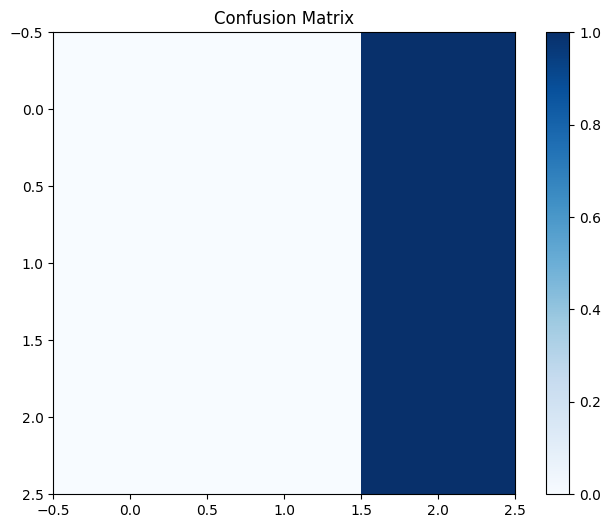

In [67]:
h = [1, 2]
W1_1nl2, W2_1nl2, W3_1nl2, b1_1nl2, b2_1nl2, b3_1nl2 = nl_train(nl_training.drop('label', axis=1).values, nl_training['label'].values, epochs=1000, learning_rate=0.01, hidden_layer_sizes=h)

y_pred = nl_predict(nl_validation.drop('label', axis=1).values , W1_1nl2, W2_1nl2, W3_1nl2, b1_1nl2, b2_1nl2, b3_1nl2)
accuracy = np.mean(y_pred == nl_validation['label'].values-1)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

confusion_matrix = np.zeros((3, 3))
confusion_matrix[nl_validation['label'].values-1, y_pred] += 1
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

Epoch 0 Loss: 0.4009637289950147
Epoch 100 Loss: 0.13745161942139025
Epoch 200 Loss: 0.12773264553015387
Epoch 300 Loss: 0.1210535922333822
Epoch 400 Loss: 0.11575291915189848
Epoch 500 Loss: 0.11155031889678294
Epoch 600 Loss: 0.1081980787147021
Epoch 700 Loss: 0.10515363214335877
Epoch 800 Loss: 0.10259583411159022
Epoch 900 Loss: 0.1003526612860624
Validation Accuracy: 75.83%


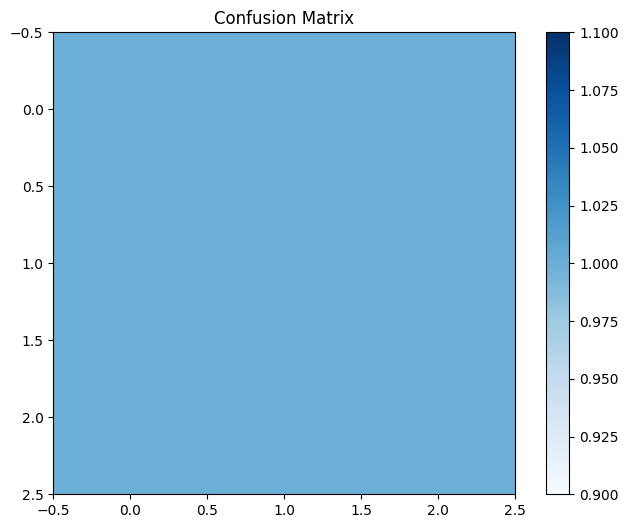

In [68]:
h = [3, 3]
W1_3nl3, W2_3nl3, W3_3nl3, b1_3nl3, b2_3nl3, b3_3nl3 = nl_train(nl_training.drop('label', axis=1).values, nl_training['label'].values, epochs=1000, learning_rate=0.01, hidden_layer_sizes=h)

y_pred = nl_predict(nl_validation.drop('label', axis=1).values , W1_3nl3, W2_3nl3, W3_3nl3, b1_3nl3, b2_3nl3, b3_3nl3)
accuracy = np.mean(y_pred == nl_validation['label'].values-1)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

confusion_matrix = np.zeros((3, 3))
confusion_matrix[nl_validation['label'].values-1, y_pred] += 1
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

Epoch 0 Loss: 0.28528460348977086
Epoch 100 Loss: 0.12000205707592163
Epoch 200 Loss: 0.10856145516996903
Epoch 300 Loss: 0.10092335263129695
Epoch 400 Loss: 0.09474220415507645
Epoch 500 Loss: 0.08880689181649708
Epoch 600 Loss: 0.0833110221042954
Epoch 700 Loss: 0.0779794240223776
Epoch 800 Loss: 0.07305901095352617
Epoch 900 Loss: 0.06846606416892465
Validation Accuracy: 79.44%


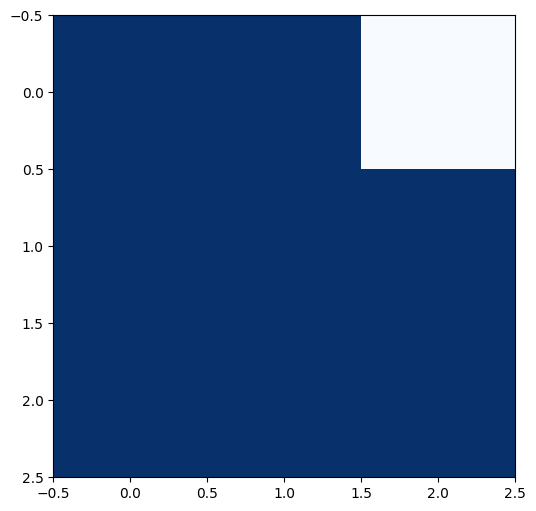

In [69]:
h = [5, 6]
W1_5nl6, W2_5nl6, W3_5nl6, b1_5nl6, b2_5nl6, b3_5nl6 = nl_train(nl_training.drop('label', axis=1).values, nl_training['label'].values, epochs=1000, learning_rate=0.01, hidden_layer_sizes=h)

y_pred = nl_predict(nl_validation.drop('label', axis=1).values , W1_5nl6, W2_5nl6, W3_5nl6, b1_5nl6, b2_5nl6, b3_5nl6)
accuracy = np.mean(y_pred == nl_validation['label'].values-1)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

confusion_matrix = np.zeros((3, 3))
confusion_matrix[nl_validation['label'].values-1, y_pred] += 1
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')

Epoch 0 Loss: 0.3598910111132119
Epoch 100 Loss: 0.10003779273631078
Epoch 200 Loss: 0.07505207757157609
Epoch 300 Loss: 0.060512606655222435
Epoch 400 Loss: 0.04955518804536069
Epoch 500 Loss: 0.04002032483814108
Epoch 600 Loss: 0.02974773460484563
Epoch 700 Loss: 0.018966906723785194
Epoch 800 Loss: 0.012843676939847058
Epoch 900 Loss: 0.00912736865665491
Epoch 1000 Loss: 0.0067204923182164
Epoch 1100 Loss: 0.005143789867148089
Epoch 1200 Loss: 0.004059288157000001
Epoch 1300 Loss: 0.00331030506448176
Epoch 1400 Loss: 0.0027588919635173404
Epoch 1500 Loss: 0.002337083594869055
Epoch 1600 Loss: 0.002002568682011056
Epoch 1700 Loss: 0.0017270921781604512
Epoch 1800 Loss: 0.001496794520724321
Epoch 1900 Loss: 0.0013085615359808222
Epoch 2000 Loss: 0.0011526760768176738
Epoch 2100 Loss: 0.0010215656258762795
Epoch 2200 Loss: 0.0009118795195827187
Epoch 2300 Loss: 0.0008191573045138167
Epoch 2400 Loss: 0.0007404353916843432
Epoch 2500 Loss: 0.0006727504760558893
Epoch 2600 Loss: 0.0006117

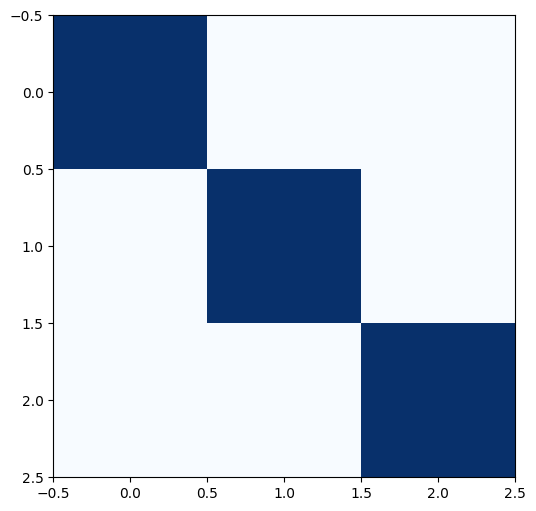

In [70]:
h = [5, 7]
W1_5nl7, W2_5nl7, W3_5nl7, b1_5nl7, b2_5nl7, b3_5nl7 = nl_train(nl_training.drop('label', axis=1).values, nl_training['label'].values, epochs=6000, learning_rate=0.01, hidden_layer_sizes=h)

y_pred = nl_predict(nl_validation.drop('label', axis=1).values , W1_5nl7, W2_5nl7, W3_5nl7, b1_5nl7, b2_5nl7, b3_5nl7)
accuracy = np.mean(y_pred == nl_validation['label'].values-1)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

confusion_matrix = np.zeros((3, 3))
confusion_matrix[nl_validation['label'].values-1, y_pred] += 1
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')

Thus we see that the best architecture is with hidden nodes = 5, 7.


##Average error vs No. of epochs

Epoch 0 Loss: 0.3415529437174732
Epoch 1000 Loss: 0.01442348858119041
Epoch 2000 Loss: 0.0018653975476982754
Epoch 3000 Loss: 0.000510414472532574
Epoch 4000 Loss: 0.0002176855851665205
Epoch 5000 Loss: 0.00011803541377282733
Epoch 6000 Loss: 7.04221852680058e-05
Epoch 7000 Loss: 4.4145850760146134e-05
Epoch 8000 Loss: 3.057094260456219e-05
Epoch 9000 Loss: 2.22526428513339e-05


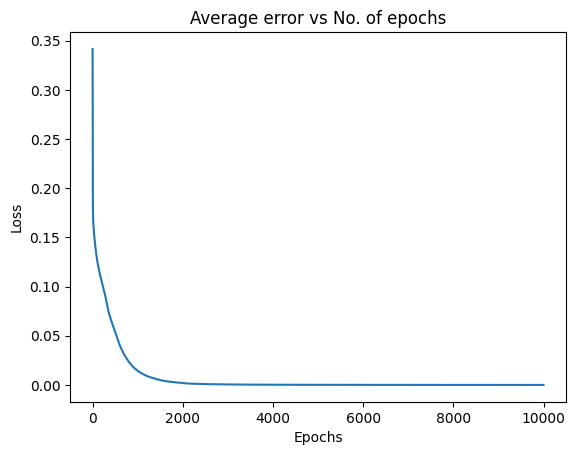

Validation Accuracy: 100.00%


In [71]:
def nl_train_with_error(X, y, epochs=1000, learning_rate=0.01, hidden_layer_sizes=(64, 64)):
    input_size = X.shape[1]
    hidden_size1, hidden_size2 = hidden_layer_sizes
    output_size = len(np.unique(y))

    # Initialize weights and biases
    W1 = np.random.randn(input_size, hidden_size1)
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2)
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size)
    b3 = np.zeros((1, output_size))

    y_one_hot = np.eye(output_size)[y-1]
    Loss = []


    for epoch in range(epochs):
        # Forward Propagation
        z1 = np.dot(X, W1) + b1
        a1 = nl_relu(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = nl_relu(z2)
        z3 = np.dot(a2, W3) + b3
        y_pred = nl_softmax(z3)

        # Loss Calculation
        loss = nl_squared_loss(y_pred, y_one_hot) # Use squared loss
        Loss.append(loss)

        # Backward Propagation and weight update
        W1, W2, W3, b1, b2, b3 = nl_backward(X, y_one_hot, y_pred, W1, W2, W3, b1, b2, b3, a1, a2, z1, z2, learning_rate)

        if epoch % 1000 == 0:
            print(f'Epoch {epoch} Loss: {loss}')
    plt.plot(Loss, label='Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Average error vs No. of epochs')
    plt.show()
    return W1, W2, W3, b1, b2, b3

h = [5, 7]
W1_5nl7, W2_5nl7, W3_5nl7, b1_5nl7, b2_5nl7, b3_5nl7 = nl_train_with_error(nl_training.drop('label', axis=1).values, nl_training['label'].values, epochs=10000, learning_rate=0.01, hidden_layer_sizes=h)

y_pred = nl_predict(nl_validation.drop('label', axis=1).values , W1_5nl7, W2_5nl7, W3_5nl7, b1_5nl7, b2_5nl7, b3_5nl7)
accuracy = np.mean(y_pred == nl_validation['label'].values-1)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')



###Decision region of the best architecture

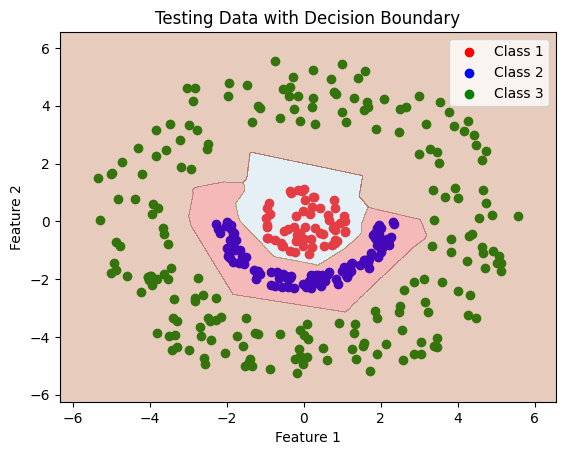

In [72]:
def plot_classifier(X, y, W1, W2, W3, b1, b2, b3):
  # Separate data by class
  class1_x = X[y == 1, 0]
  class1_y = X[y == 1, 1]
  class2_x = X[y == 2, 0]
  class2_y = X[y == 2, 1]
  class3_x = X[y == 3, 0]
  class3_y = X[y == 3, 1]

  plt.scatter(class1_x, class1_y, color='red', label='Class 1')
  plt.scatter(class2_x, class2_y, color='blue', label='Class 2')
  plt.scatter(class3_x, class3_y, color='green', label='Class 3')

  # Generate grid for plotting decision boundary
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  # Predict on the grid
  grid = np.c_[xx.ravel(), yy.ravel()]
  z1 = np.dot(grid, W1) + b1
  a1 = nl_relu(z1)
  z2 = np.dot(a1, W2) + b2
  a2 = nl_relu(z2)
  z3 = np.dot(a2, W3) + b3
  y_pred = nl_softmax(z3)
  Z = np.argmax(y_pred, axis=1) + 1  # Get the predicted class
  Z = Z.reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Testing Data with Decision Boundary')
  plt.legend()
  plt.show()

plot_classifier(nl_test.drop('label', axis=1).values, nl_test['label'].values, W1_5nl7, W2_5nl7, W3_5nl7, b1_5nl7, b2_5nl7, b3_5nl7)


##Confusion Matrix of best architecture

Accuracy: 1.0


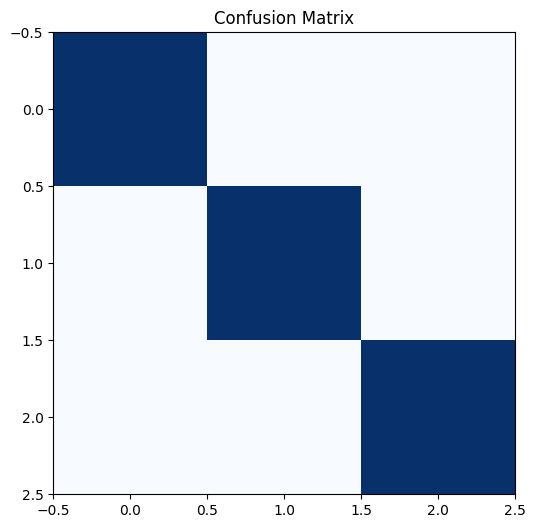

In [73]:

plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')

accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
print(f"Accuracy: {accuracy}")

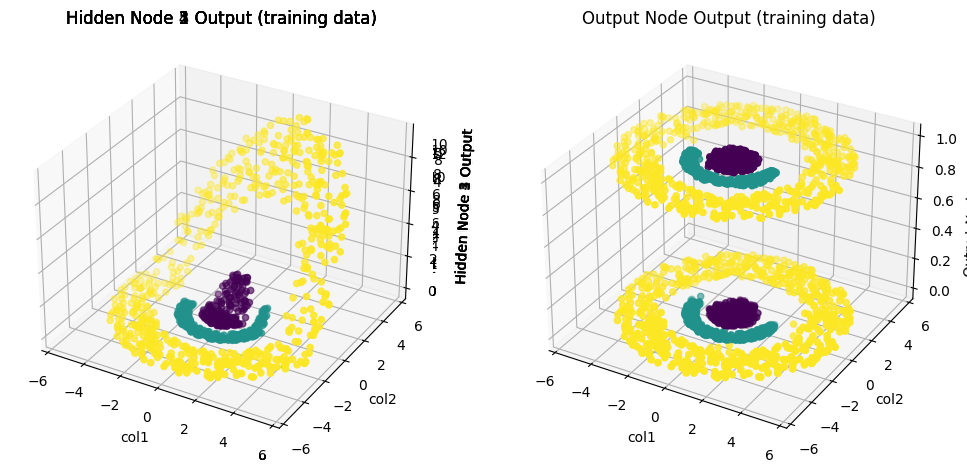

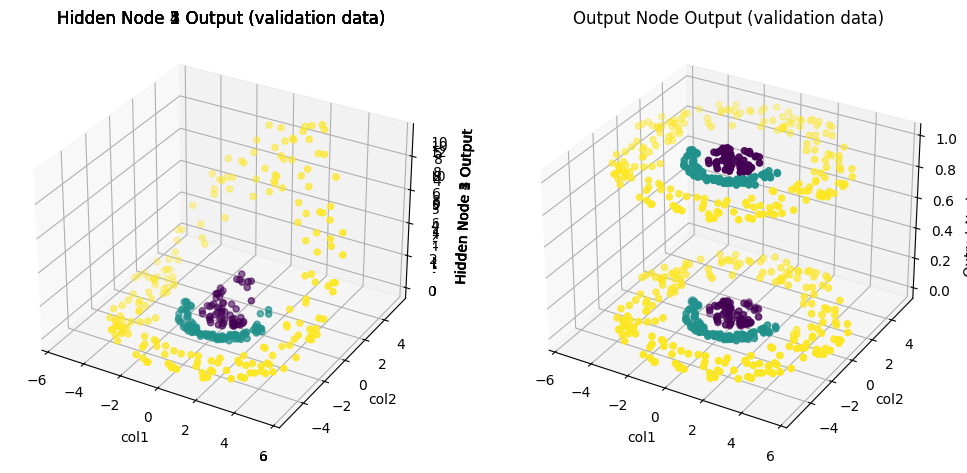

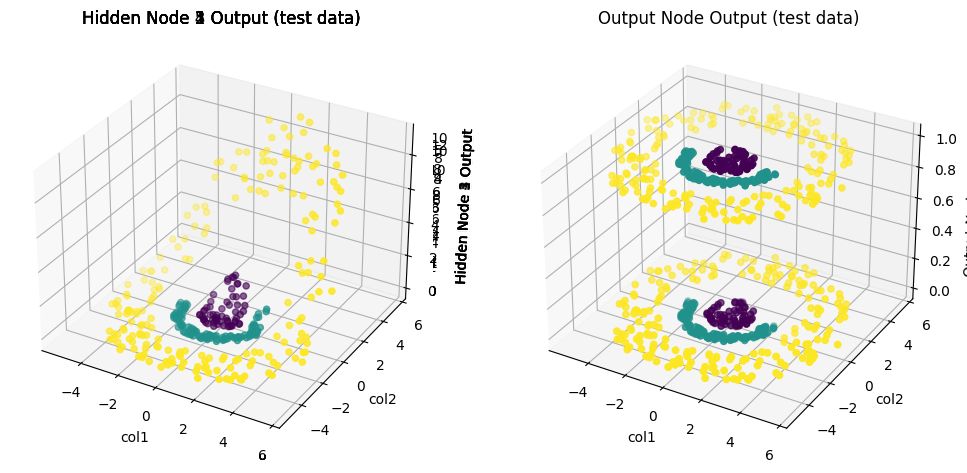

In [74]:
def plot_hidden_output_nodes(X, y, W1, W2, W3, b1, b2, b3, data_type):

  # Forward Propagation
  z1 = np.dot(X, W1) + b1
  a1 = nl_relu(z1)
  z2 = np.dot(a1, W2) + b2
  a2 = nl_relu(z2)
  z3 = np.dot(a2, W3) + b3
  y_pred = nl_softmax(z3)

  # Plotting hidden layer outputs
  fig = plt.figure(figsize=(12, 6))
  for i in range(W2.shape[0]):  # Iterate over hidden nodes
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], a1[:, i], c=y, cmap='viridis')
    ax.set_xlabel('col1')
    ax.set_ylabel('col2')
    ax.set_zlabel(f'Hidden Node {i+1} Output')
    ax.set_title(f'Hidden Node {i+1} Output ({data_type} data)')

  # Plotting output layer outputs
  ax = fig.add_subplot(1, 2, 2, projection='3d')
  for i in range(W3.shape[1]):  # Iterate over output nodes
    ax.scatter(X[:, 0], X[:, 1], y_pred[:, i], c=y, cmap='viridis')
  ax.set_xlabel('col1')
  ax.set_ylabel('col2')
  ax.set_zlabel('Output Node Output')
  ax.set_title(f'Output Node Output ({data_type} data)')
  plt.show()


# Plot for training data
plot_hidden_output_nodes(nl_training.drop('label', axis=1).values, nl_training['label'].values, W1_5nl7, W2_5nl7, W3_5nl7, b1_5nl7, b2_5nl7, b3_5nl7, 'training')

# Plot for validation data
plot_hidden_output_nodes(nl_validation.drop('label', axis=1).values, nl_validation['label'].values, W1_5nl7, W2_5nl7, W3_5nl7, b1_5nl7, b2_5nl7, b3_5nl7, 'validation')

# Plot for test data
plot_hidden_output_nodes(nl_test.drop('label', axis=1).values, nl_test['label'].values, W1_5nl7, W2_5nl7, W3_5nl7, b1_5nl7, b2_5nl7, b3_5nl7, 'test')
